<a href="https://colab.research.google.com/github/Tomasgonzalezarce/test/blob/main/parte_2_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3fm9szy2/1valcotu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3fm9szy2/36mt035i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20588', 'data', 'file=/tmp/tmp3fm9szy2/1valcotu.json', 'init=/tmp/tmp3fm9szy2/36mt035i.json', 'output', 'file=/tmp/tmp3fm9szy2/prophet_modeldxr35s6_/prophet_model-20230724195653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:56:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:56:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


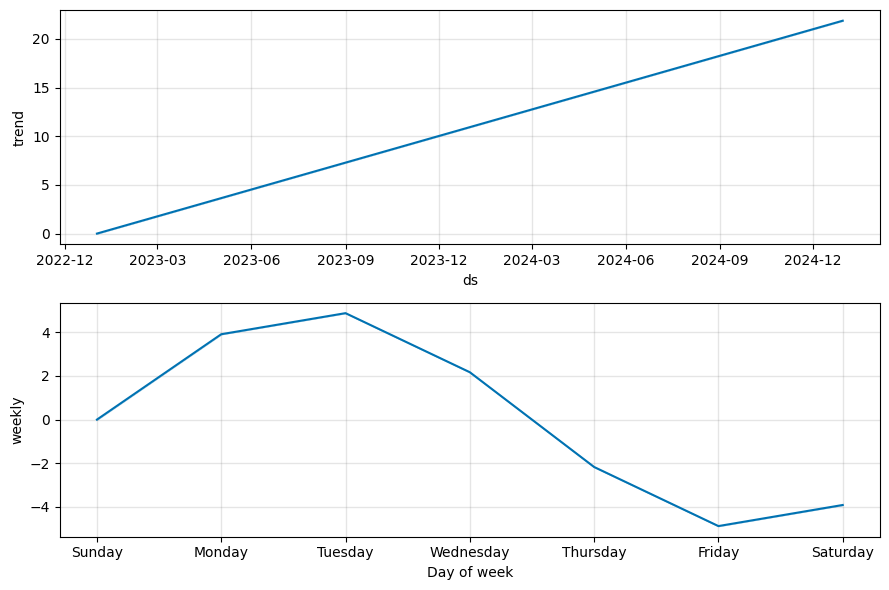

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Función para generar la serie de tiempo con tendencia lineal y estacionalidad semanal
def generar_serie_tendencia_semanal(n):
    tiempo = pd.date_range(start='2023-01-01', periods=n, freq='D')
    tendencia_lineal = 0.03 * np.arange(n)
    estacionalidad_semanal = 5 * np.sin(2 * np.pi * np.arange(n) / 7)  # Estacionalidad con periodo semanal (7 días)
    serie_tiempo = tendencia_lineal + estacionalidad_semanal
    return pd.DataFrame({'ds': tiempo, 'y': serie_tiempo})

# Generar la serie de tiempo con 365 días (1 año)
n_dias = 365
serie_tiempo = generar_serie_tendencia_semanal(n_dias)

# Crear un modelo Prophet y ajustarlo a los datos
modelo = Prophet()
modelo.fit(serie_tiempo)

# Generar una predicción con el modelo para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)

# Realizar la predicción
prediccion = modelo.predict(futuro)

# Visualizar la descomposición de la serie de tiempo en tendencia y estacionalidad
fig = modelo.plot_components(prediccion)
plt.show()

Genera una serie de tiempo que tenga una tendencia no lineal y una estacionalidad diaria, y utiliza Prophet para descomponerla en su tendencia y componentes estacionales. Visualiza la descomposición.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3fm9szy2/2mjc0ccj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3fm9szy2/yjs9ramr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72958', 'data', 'file=/tmp/tmp3fm9szy2/2mjc0ccj.json', 'init=/tmp/tmp3fm9szy2/yjs9ramr.json', 'output', 'file=/tmp/tmp3fm9szy2/prophet_model3dwy62ev/prophet_model-20230724195901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


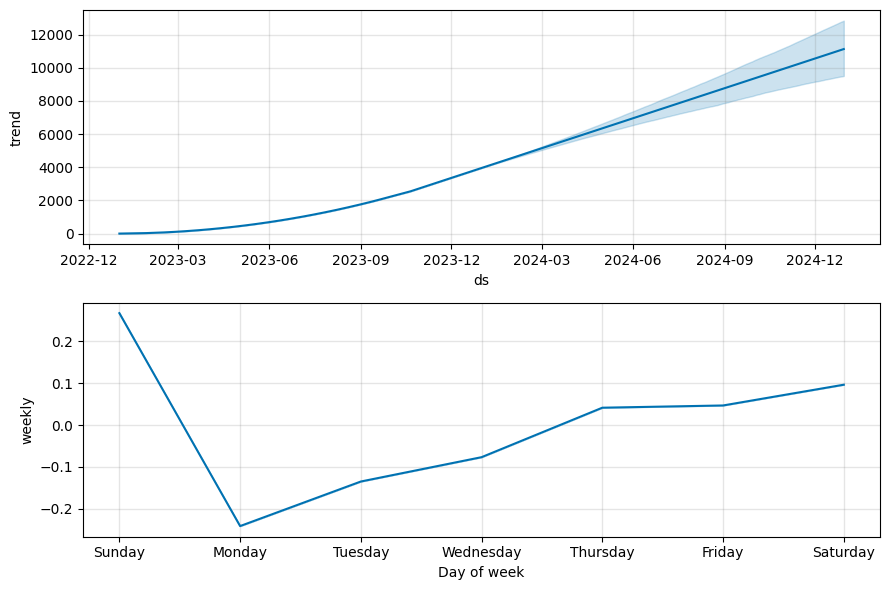

In [2]:
from prophet import Prophet

# Función para generar la serie de tiempo con tendencia no lineal y estacionalidad diaria
def generar_serie_tendencia_estacionalidad(n):
    tiempo = pd.date_range(start='2023-01-01', periods=n, freq='D')
    tendencia_no_lineal = 0.03 * np.arange(n)**2  # Tendencia cuadrática
    estacionalidad_diaria = 10 * np.sin(2 * np.pi * np.arange(n) / 365)  # Estacionalidad con periodo diario (365 días)
    serie_tiempo = tendencia_no_lineal + estacionalidad_diaria
    return pd.DataFrame({'ds': tiempo, 'y': serie_tiempo})

# Generar la serie de tiempo con 365 días (1 año)
n_dias = 365
serie_tiempo = generar_serie_tendencia_estacionalidad(n_dias)

# Crear un modelo Prophet y ajustarlo a los datos
modelo = Prophet()
modelo.fit(serie_tiempo)

# Generar una predicción con el modelo para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)

# Realizar la predicción
prediccion = modelo.predict(futuro)

# Visualizar la descomposición de la serie de tiempo en tendencia y estacionalidad
fig = modelo.plot_components(prediccion)
plt.show()